In [16]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

def create_3d_graph(n, n_stacks):
    G = nx.Graph()
    
    def get_node_positions(x, y, z):
        base_coords = np.array([
            [0, 0, 0],
            [1, 0, 0],
            [1, 1, 0],
            [0, 1, 0]  # Added fourth corner
        ]) * (1/n * 0.8)
        
        cell_center = np.array([x/n + 1/(2*n), y/n + 1/(2*n), z/(n_stacks-1)])  # Adjusted z-coordinate
        square_center = np.mean(base_coords, axis=0)
        offset = cell_center - square_center
        
        return [tuple(coord + offset) for coord in base_coords]

    for z in range(n_stacks):  # Changed to n_stacks
        for y in range(n):
            for x in range(n):
                node = (x, y, z)
                positions = get_node_positions(x, y, z)
                G.add_node(node, pos=positions, id=z*16 + y*8 + x)

                if x < n - 1:
                    G.add_edge((x, y, z), (x+1, y, z))
                if y < n - 1:
                    G.add_edge((x, y, z), (x, y+1, z))
                if z < n_stacks - 1:  # Changed to n_stacks - 1
                    G.add_edge((x, y, z), (x, y, z+1))

    return G

def plot_3d_graph_plotly(G):
    edge_x, edge_y, edge_z = [], [], []
    for edge in G.edges():
        for i in range(4):  # Changed to 4 to include all corners
            x0, y0, z0 = G.nodes[edge[0]]['pos'][i]
            x1, y1, z1 = G.nodes[edge[1]]['pos'][i]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                              line=dict(width=2, color='#888'),
                              hoverinfo='none', mode='lines')

    node_x, node_y, node_z = [], [], []
    for node in G.nodes():
        for pos in G.nodes[node]['pos']:
            node_x.append(pos[0])
            node_y.append(pos[1])
            node_z.append(pos[2])

    node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers',
                              hoverinfo='text', marker=dict(showscale=True, colorscale='Viridis',
                                                            size=5, colorbar=dict(thickness=15, title='Node Connections',
                                                                                  xanchor='left', titleside='right'),
                                                            line_width=2))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in G.adjacency():
        node_adjacencies.extend([len(adjacencies)] * 4)  # Changed to 4
        for _ in range(4):  # Changed to 4
            node_text.append(f'Node: {node}<br>ID: {G.nodes[node]["id"]}<br># of connections: {len(adjacencies)}')

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    layout = go.Layout(title='3D Graph with All Stacks',
                       scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z', aspectmode='cube'),
                       margin=dict(r=20, l=10, b=10, t=40), showlegend=False, hovermode='closest')

    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

# Example usage:
n = 4
n_stacks = 8
G = create_3d_graph(n, n_stacks)
plot_3d_graph_plotly(G)

# Print node information to verify
for node in G.nodes():
    print(f"Node: {node}, ID: {G.nodes[node]['id']}, Positions: {G.nodes[node]['pos']}")

Node: (0, 0, 0), ID: 0, Positions: [(0.024999999999999994, 0.024999999999999994, 0.0), (0.225, 0.024999999999999994, 0.0), (0.225, 0.225, 0.0), (0.024999999999999994, 0.225, 0.0)]
Node: (1, 0, 0), ID: 1, Positions: [(0.275, 0.024999999999999994, 0.0), (0.47500000000000003, 0.024999999999999994, 0.0), (0.47500000000000003, 0.225, 0.0), (0.275, 0.225, 0.0)]
Node: (0, 1, 0), ID: 8, Positions: [(0.024999999999999994, 0.275, 0.0), (0.225, 0.275, 0.0), (0.225, 0.47500000000000003, 0.0), (0.024999999999999994, 0.47500000000000003, 0.0)]
Node: (0, 0, 1), ID: 16, Positions: [(0.024999999999999994, 0.024999999999999994, 0.14285714285714285), (0.225, 0.024999999999999994, 0.14285714285714285), (0.225, 0.225, 0.14285714285714285), (0.024999999999999994, 0.225, 0.14285714285714285)]
Node: (2, 0, 0), ID: 2, Positions: [(0.525, 0.024999999999999994, 0.0), (0.7250000000000001, 0.024999999999999994, 0.0), (0.7250000000000001, 0.225, 0.0), (0.525, 0.225, 0.0)]
Node: (1, 1, 0), ID: 9, Positions: [(0.275,

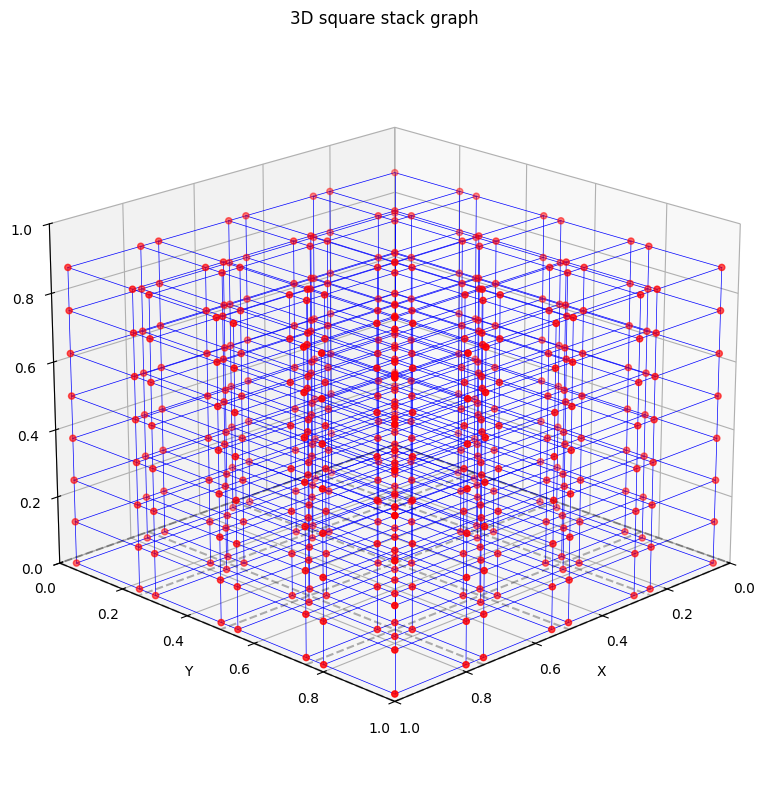

Node: (0, 0, 0, 0), ID: 0, Position: (0.024999999999999994, 0.024999999999999994, 0.0)
Node: (0, 0, 0, 1), ID: 0, Position: (0.225, 0.024999999999999994, 0.0)
Node: (0, 0, 0, 2), ID: 0, Position: (0.225, 0.225, 0.0)
Node: (0, 0, 0, 3), ID: 0, Position: (0.024999999999999994, 0.225, 0.0)
Node: (1, 0, 0, 0), ID: 1, Position: (0.275, 0.024999999999999994, 0.0)
Node: (1, 0, 0, 3), ID: 1, Position: (0.275, 0.225, 0.0)
Node: (0, 1, 0, 1), ID: 4, Position: (0.225, 0.275, 0.0)
Node: (0, 1, 0, 0), ID: 4, Position: (0.024999999999999994, 0.275, 0.0)
Node: (0, 1, 0, 2), ID: 4, Position: (0.225, 0.47500000000000003, 0.0)
Node: (0, 1, 0, 3), ID: 4, Position: (0.024999999999999994, 0.47500000000000003, 0.0)
Node: (1, 1, 0, 0), ID: 5, Position: (0.275, 0.275, 0.0)
Node: (1, 1, 0, 3), ID: 5, Position: (0.275, 0.47500000000000003, 0.0)
Node: (0, 2, 0, 1), ID: 8, Position: (0.225, 0.525, 0.0)
Node: (0, 2, 0, 0), ID: 8, Position: (0.024999999999999994, 0.525, 0.0)
Node: (0, 2, 0, 2), ID: 8, Position: (0.

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def create_3d_graph(n, n_stacks):
    # Create an empty graph
    G = nx.Graph()

    def get_node_id(x, y, z):
        return x + n*y + n*n*z

    # Function to create a square in a given cell and layer
    def create_square(cell_x, cell_y, layer):
        base_coords = np.array([
            [0, 0, 0],
            [1, 0, 0],
            [1, 1, 0],
            [0, 1, 0]
        ]) * (1/n * 0.8)  # Scale down to fit in one cell with margin
        
        # Center the square within the cell
        cell_center = np.array([cell_x/n + 1/(2*n), cell_y/n + 1/(2*n), layer/n_stacks])
        square_center = np.mean(base_coords, axis=0)
        offset = cell_center - square_center
        
        # Translate to the correct cell, center, and layer
        coords = base_coords + offset
        
        # Add nodes to the graph
        nodes = []
        for i, coord in enumerate(coords):
            node = (cell_x, cell_y, layer, i)
            G.add_node(node, pos=tuple(coord), id=get_node_id(cell_x, cell_y, layer))
            nodes.append(node)
        
        # Add edges to form the square
        edges = [(nodes[i], nodes[(i+1)%4]) for i in range(4)]
        G.add_edges_from(edges)
        
        return nodes

    # Create squares in all cells and layers
    for z in range(n_stacks):
        for x in range(n):
            for y in range(n):
                current_square = create_square(x, y, z)
                
                # Connect to square below if not in the bottom layer
                if z > 0:
                    square_below = [(x, y, z-1, i) for i in range(4)]
                    for i in range(4):
                        G.add_edge(current_square[i], square_below[i])

                # Connect to right neighbor
                if x < n - 1:
                    G.add_edge((x, y, z, 1), (x+1, y, z, 0))
                    G.add_edge((x, y, z, 2), (x+1, y, z, 3))
                # Connect to top neighbor
                if y < n - 1:
                    G.add_edge((x, y, z, 2), (x, y+1, z, 1))
                    G.add_edge((x, y, z, 3), (x, y+1, z, 0))

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw nodes
    node_pos = nx.get_node_attributes(G, 'pos')
    x, y, z = zip(*node_pos.values())
    ax.scatter(x, y, z, c='r', s=20)

    # Draw edges
    for edge in G.edges():
        x = [node_pos[edge[0]][0], node_pos[edge[1]][0]]
        y = [node_pos[edge[0]][1], node_pos[edge[1]][1]]
        z = [node_pos[edge[0]][2], node_pos[edge[1]][2]]
        ax.plot(x, y, z, c='b', linewidth=0.5)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D square stack graph')

    # Set axis limits to show the full graph space
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    # Add grid lines to show the nxnxn_stacks cell structure
    for i in range(n + 1):
        ax.plot([i/n, i/n], [0, 1], [0, 0], 'k--', alpha=0.3)
        ax.plot([0, 1], [i/n, i/n], [0, 0], 'k--', alpha=0.3)
    for i in range(n_stacks + 1):
        ax.plot([0, 0], [0, 0], [i/n_stacks, i/n_stacks], 'k--', alpha=0.3)

    # Adjust view angle
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

    return G

# Example usage:
G = create_3d_graph(4, 8)  # Creates a 4x4x3 grid of connected squares

# Print node IDs to verify
for node in G.nodes():
    print(f"Node: {node}, ID: {G.nodes[node]['id']}, Position: {G.nodes[node]['pos']}")